In [1]:
import pandas as pd
import nltk

In [2]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [3]:
!ls ../../Data/judge-1377884607_tweet_product_company.csv

../../Data/judge-1377884607_tweet_product_company.csv


In [4]:
file = '../../Data/judge-1377884607_tweet_product_company.csv'

In [5]:
judge_tweet_df = pd.read_csv(file, encoding='unicode_escape')

In [6]:
judge_tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
# The columns looks long 
judge_tweet_df.columns = ['tweet', 'product/company', 'emotion']

In [8]:
judge_tweet_df.head(21)

,tweet,product/company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [9]:
tweet_df = judge_tweet_df.copy()

In [10]:
tweet_df.shape

(9093, 3)

In [11]:
tweet_df.emotion.unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [12]:
# we can probably change the values and drop 'I cant tell'
tweet_df[judge_tweet_df['emotion'] == "I can't tell"]

,tweet,product/company,emotion
90,Thanks to @mention for publishing the news of ...,NaN,I can't tell
102,ÛÏ@mention &quot;Apple has opened a pop-up st...,NaN,I can't tell
237,Just what America needs. RT @mention Google to...,NaN,I can't tell
341,The queue at the Apple Store in Austin is FOUR...,NaN,I can't tell
368,Hope it's better than wave RT @mention Buzz is...,NaN,I can't tell
...,...,...,...
9020,It's funny watching a room full of people hold...,NaN,I can't tell
9032,"@mention yeah, we have @mention , Google has n...",NaN,I can't tell
9037,"@mention Yes, the Google presentation was not ...",NaN,I can't tell
9058,&quot;Do you know what Apple is really good at...,NaN,I can't tell


In [13]:
# check what is inside the company and product section
tweet_df['product/company'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [14]:
tweet_df['product/company']

0                   iPhone
1       iPad or iPhone App
2                     iPad
3       iPad or iPhone App
4                   Google
               ...        
9088                  iPad
9089                   NaN
9090                   NaN
9091                   NaN
9092                   NaN
Name: product/company, Length: 9093, dtype: object

In [15]:
tweet_df.emotion.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [16]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet            9092 non-null   object
 1   product/company  3291 non-null   object
 2   emotion          9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [17]:
tweet_df.isna().sum()

tweet                 1
product/company    5802
emotion               0
dtype: int64

In [18]:
tweet_df['product/company'].isna().sum()

5802

In [19]:
tweet_df = tweet_df.dropna(subset=['tweet'])

In [20]:
from textblob import TextBlob

In [21]:
# define a function that loop through the text to get the sentiment
def sentiment(text):
    analysis = TextBlob(text)
    emotion =  analysis.sentiment.polarity
    if (emotion < 0):
        return 'Negative' 
    elif (emotion == 0):
        return 'Neutral'
    else:
        return 'Positive'

sentiment_dict = {'No emotion toward brand or product': 'Neutral',
                 'Positive emotion': 'Positive',
                'Negative emotion': 'Negative',
                "I can't tell": "Unknown"}

In [22]:
sentiment(tweet_df['tweet'][22])
# tweet_df['tweet'][2]

'Positive'

In [23]:
tweet_df['blob_emotion'] = tweet_df['tweet'].apply(lambda row: sentiment(row))
# tweet_df['blob_emotion'] = tweet_df['tweet'].map(sentiment)

In [24]:
tweet_df['emotion'] = tweet_df['emotion'].map(sentiment_dict)

In [25]:
tweet_df.head(10)

,tweet,product/company,emotion,blob_emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Negative
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Neutral
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Positive
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,Neutral,Positive
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive,Positive
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive,Positive
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive,Positive
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive,Negative


In [26]:
# by_textblob =  tweets.groupby(['text_blob_sentiment'])['tweet_text'].count()
grouped_blob_emotion = tweet_df.groupby(['blob_emotion'])['tweet'].count()
# grouped_emotion = tweet_df.groupby(['blob_emotion'])['tweet'].count()

In [27]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='blob_emotion'>

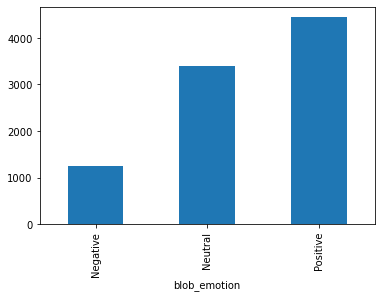

In [28]:
grouped_blob_emotion.plot.bar()

In [29]:
tweet_df['compare'] = (tweet_df['blob_emotion'] == tweet_df['emotion']) 

In [30]:
tweet_df

,tweet,product/company,emotion,blob_emotion,compare
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Negative,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Positive,True
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Negative,False
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Neutral,False
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Positive,True
...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Neutral,False
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,Neutral,Neutral,True
9090,"Google's Zeiger, a physician never reported po...",NaN,Neutral,Neutral,True
9091,Some Verizon iPhone customers complained their...,NaN,Neutral,Negative,False


In [31]:
tweet_df['compare'].value_counts()

False    4732
True     4360
Name: compare, dtype: int64

### Checking the positvie emotion for analysis 

In [32]:
positive_sentiment_df = tweet_df[tweet_df['emotion'] == 'Positive']

In [34]:
positive_doc = positive_sentiment_df['tweet'].to_list()

In [ ]:
def preproce